# Homework 03
## Özlem Ölçer ID: 69217

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog(x):
    return(np.log(x + 1e-100))

import data

In [50]:
data = np.genfromtxt("hw03_data_set.csv", delimiter = ",")

train_data = data[1:151,:] 
test_data = data[151:,:]

K = np.max(train_data[:, 1])
N = train_data.shape[0]


Parameters

In [51]:
print(test_data.shape[0])
print(train_data.shape[0])

122
150


In [52]:
bin_width = 0.37
origin = 1.5

max_xtrain = np.max(train_data[:, 0])


bins = np.arange(origin, max_xtrain, bin_width)

bins = np.append(bins, max_xtrain)


print(bins)

[1.5  1.87 2.24 2.61 2.98 3.35 3.72 4.09 4.46 4.83 5.1 ]


Learn Regressogram

In [53]:
def regressogram_g(x, dataset):
    tot = 0
    div = 0
    for i in range(len(dataset[:, 0])):
        if(bins[x] <= dataset[i, 0] and dataset[i, 0] <= bins[x+1]):
            tot += dataset[i, 1]
            div += 1           
    return tot/div

y_pred=[]
for x in range(len(bins)-1):
    y_pred = np.append(y_pred, regressogram_g(x, train_data))
    
print(y_pred.shape)

(10,)


Plot Regressogram

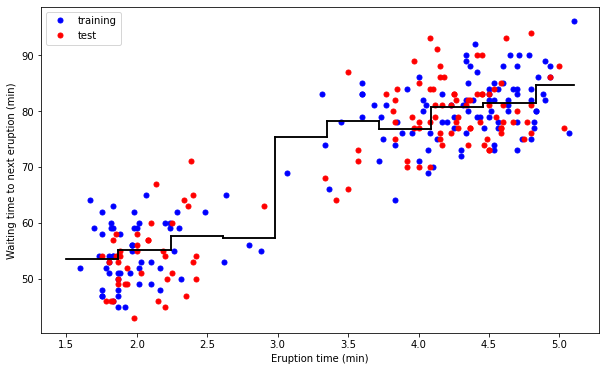

In [54]:
# Figure 1
plt.figure(figsize=(10, 6))

# Draw training points
plt.plot(train_data[:, 0], train_data[:, 1], "b.", markersize=10, label='training')
# Draw test points
plt.plot(test_data[:, 0], test_data[:, 1], "r.", markersize=10, label='test')

# Draw regressogram
# horizontal
for i in range(len(bins) - 1):
    plt.plot([bins[i], bins[i + 1]], [y_pred[i], y_pred[i]], "k-")
# vertical
for i in range(len(bins) - 2):
    plt.plot([bins[i + 1], bins[i + 1]], [y_pred[i], y_pred[i + 1]], "k-")



# Draw regressogram
# horizontal
for i in range(len(bins) - 1):
    plt.plot([bins[i], bins[i + 1]], [y_pred[i], y_pred[i]], "k-")
# vertical
for i in range(len(bins) - 2):
    plt.plot([bins[i + 1], bins[i + 1]], [y_pred[i], y_pred[i + 1]], "k-")
    
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc='upper left')
plt.show()

RMSE Calculation

In [55]:
print(test_data.shape[0])
print(len(bins))

122
11


In [60]:
rmse = 0
bin_width = 0.37
origin = 1.5
for i in range(test_data.shape[0]):
    for j in range(len(bins)):

        if(bins[j] <= test_data[i, 0] and test_data[i, 0] <= bins[j+1]):
            rmse += (test_data[i, 1] - y_pred[int((test_data[i, 0] - origin) / bin_width)]) ** 2
rmse = np.sqrt(rmse/test_data.shape[0])

print("Regressogram => RMSE is ", rmse, " when h is ", bin_width)

Regressogram => RMSE is  5.962617204275407  when h is  0.37


Running Mean Smoother

In [61]:
data_interval = np.arange(origin, max_xtrain, 10e-4)
bin_width = 0.37

def mean_smoother_g(x, dataset):
    tot = 0
    div = 0
    for i in range(len(dataset[:, 0])):
        if (np.abs((x - dataset[i, 0]) / bin_width) <= 0.5):
            tot += dataset[i, 1]
            div += 1
    return tot/div

y_pred=[]
for x in data_interval:
    y_pred = np.append(y_pred, mean_smoother_g(x, train_data))

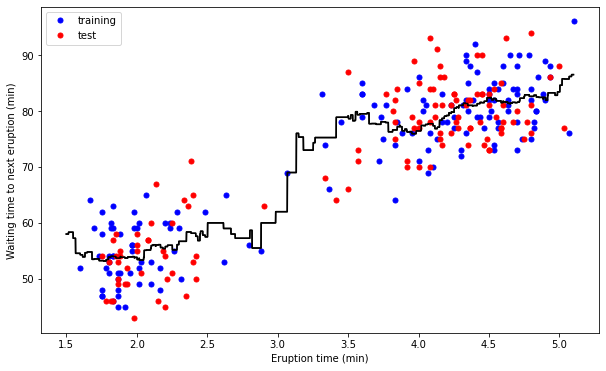

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(train_data[:, 0], train_data[:, 1], "b.", markersize=10, label='training')
plt.plot(data_interval, y_pred, "k")
plt.plot(test_data[:, 0], test_data[:, 1], "r.", markersize=10, label='test')
plt.plot(data_interval, y_pred, "k")
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc='upper left')
plt.show()

In [63]:
rmse = 0
for i in range(len(test_data)):
    rmse += (test_data[i, 1] - y_pred[round((test_data[i, 0] - origin) / 10e-4)])**2
    
rmse = np.sqrt(rmse/len(test_data))

print("Running Mean Smoother => RMSE is ", rmse, " when h is ", bin_width)

Running Mean Smoother => RMSE is  6.089003211720319  when h is  0.37


In [64]:
bin_width = 0.37

def kernel_smoother_g(x, dataset):
    tot = 0
    div = 0
    for i in range(len(dataset[:, 0])):
        k = (1.0 / np.sqrt(2 * np.pi)) * np.exp(- (((x - dataset[i, 0]) / bin_width) ** 2) / 2)
        tot += k * dataset[i, 1]
        div += k
    return tot/div

y_pred=[]
for x in data_interval:
    y_pred = np.append(y_pred, kernel_smoother_g(x, train_data))

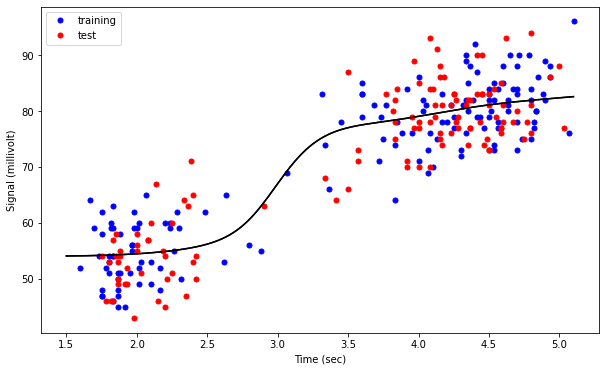

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(train_data[:, 0], train_data[:, 1], "b.", markersize=10, label='training')
plt.plot(data_interval, y_pred, "k")
plt.plot(test_data[:, 0], test_data[:, 1], "r.", markersize=10, label='test')
plt.plot(data_interval, y_pred, "k")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")
plt.legend(loc='upper left')
plt.show()


In [67]:
rmse = 0

for i in range(test_data.shape[0]):
    rmse += (test_data[i, 1] - y_pred[int((test_data[i, 0] - origin) / 10e-4)]) ** 2

rmse = np.sqrt(rmse/test_data.shape[0])

print("Kernel Smoother => RMSE is ", rmse, " when h is ", bin_width)

Kernel Smoother => RMSE is  5.873924948231805  when h is  0.37
